# Testing Algorithm Optimality

Coming up with some examples where I expect the algorithm to fail to produce 
optimal paths, and where the optimal path is relatively easy to compute.

In [1]:
import numpy as np
from util.guided_ot import accumulated_proj_diff_dijkstra, augmented_dijkstra
from util.pqdict import pqdict
from util.trajectories import *
from util.simplicial_paths import *
from util.alg_perf import dijkstra_tree, plot_proj_diffs

# Setup domain

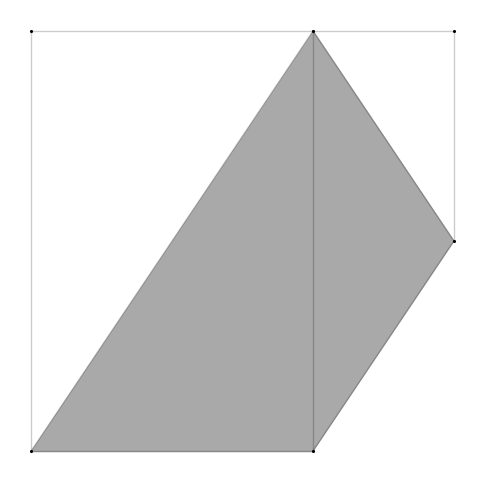

Harmonic Projection Matrix:
[[-0.44028804  0.66043206 -0.22014402 -0.22014402 -0.42565296 -0.1565194
  -0.0782597   0.2347791  -0.0782597 ]
 [-0.00926471  0.01389706 -0.00463235 -0.00463235  0.60355124 -0.4116322
  -0.2058161   0.6174483  -0.2058161 ]]


In [2]:
pts = np.array([(1,0), (1,1), (0,1), (0,-1), (-2, 1), (-2, -1)])
SC = SimplicialComplex(pts, True)
all_edges = np.array([0,1,2,3,4,5,6,7,8])
all_faces = np.array([1,3])
simps_to_add = {1:set(all_edges), 2:set(all_faces)}
coord_pairs = [[tuple(SC.nodes[i]), tuple(SC.nodes[j]), (i,j)] for (i,j) in SC.edges]
SC.add_simplices(simps_to_add)
plt.figure(figsize=(6,6))
SC.plot()
plt.show()

print("Harmonic Projection Matrix:")
print(SC.H)

start, end = 0, 5

(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)


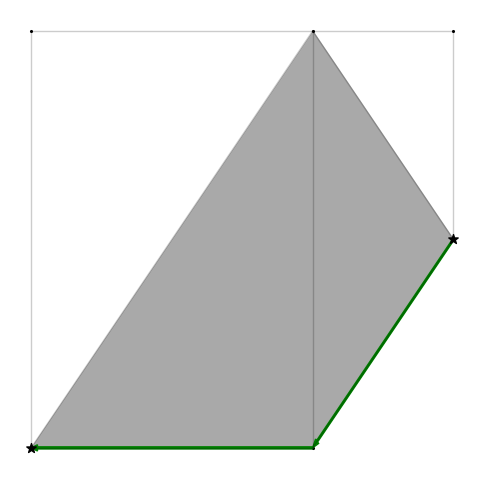

In [37]:
shortest_path, _, _, _, _ = augmented_dijkstra(SC, start, end, np.zeros(2), 0)
shortest_class = Trajectory_Class(SC)
shortest_class.add_path(shortest_path)
shortest_class.plot_paths('green', 'shortest')

[0, 1, 2, 4, 5]


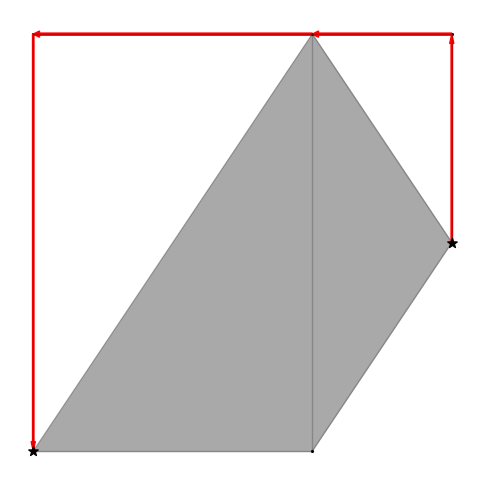

In [38]:
ref_path_class = Trajectory_Class(SC)
ref_path_class.generate_paths([(1,0), (1,1), (-2,1), (-2,-1)], 1, 1, 0)
ref_path_class.plot_paths('red', 'ref_path')
ref_path = ref_path_class.paths[0]
print(ref_path.nodes)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


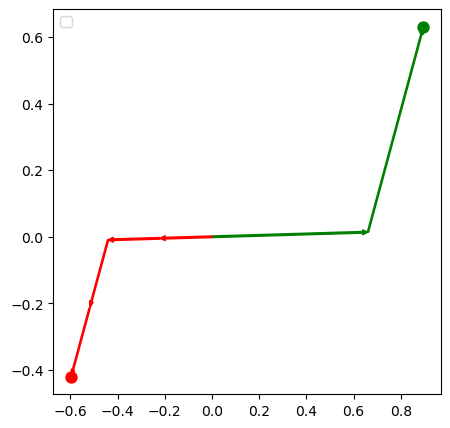

In [39]:
holder = Trajectory_Holder(SC)
holder.add_class(shortest_class, None, 'shortest', 'green')
holder.add_class(ref_path_class, None, 'reference', 'red')
holder.plot_projections(figsize=(5,5))

result:   0-2-5
shortest: 0-3-5
ref:      0-1-2-4-5


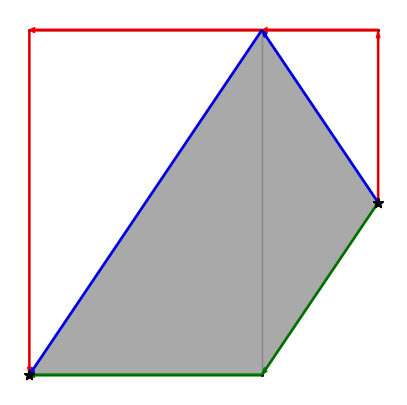

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


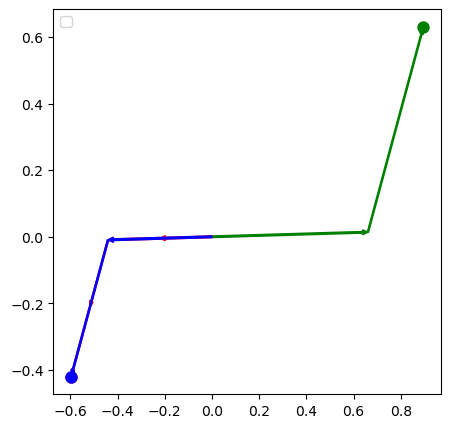

In [41]:
#alpha_star = (np.sqrt(2)-1)/3 # computed this alpha by hand (optimal path transition)
alpha = 1
path, other_paths = accumulated_proj_diff_dijkstra(SC, start, end, ref_path, alpha, 0, True)

path_proj = path.edge_projections[-1]
print("result:  ", path)
print("shortest:", shortest_path)
print("ref:     ", ref_path)


dijkstra_tree(SC, path, [shortest_path], ref_path_class, plot_others=True, plot_proj=True)

In [42]:
shortest_path.edge_projections

array([[0.        , 0.        ],
       [0.66043206, 0.01389706],
       [0.89521116, 0.63134537]])

In [43]:
path.edge_projections

array([[ 0.        ,  0.        ],
       [-0.44028804, -0.00926471],
       [-0.59680744, -0.42089691]])

In [44]:
ref_path.edge_projections

array([[ 0.        ,  0.        ],
       [-0.22014402, -0.00463235],
       [-0.44028804, -0.00926471],
       [-0.51854774, -0.21508081],
       [-0.59680744, -0.42089691]])